In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.read_csv('model_input.csv')

In [6]:
X = df.drop(columns='saleprice')
y = df['saleprice']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# Instantiate model and Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

> R2 Scores

In [10]:
# Training and testing R2 scores
r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)

print(f"Train R²: {r2_train:.4f}")
print(f"Test R²:  {r2_test:.4f}")


Train R²: 0.9344
Test R²:  0.9350


In [11]:
# Interpret the testing r2:
# 93.3% of the variability in Ames Iowa Home prices can be explained by the features in our model. 

> RMSE Scores

In [13]:
train_preds = lr.predict(X_train)

In [14]:
test_preds = lr.predict(X_test)

In [15]:
root_mean_squared_error(y_train, train_preds)

19723.312878317527

In [16]:
# Calculate RMSE on testing set
root_mean_squared_error(y_test, test_preds)

21497.411476798454

### Compare to a baseline

In [18]:
# Calculate the mean of our target in the test group
y_test.mean()

182890.16068376068

In [19]:
baseline_preds = np.full_like(y_test, y_test.mean(), dtype = float)

In [20]:
root_mean_squared_error(y_test, baseline_preds)

84319.75927548083

> Interpretation: The evaluation of our regression model against a baseline reveals its superior predictive performace. Our model achieved a test RMSE of 21497 is considerably lower than the baseline RMSE score of 84319. This substantial difference in RMSE scores underscore the effectiveness of our model in providing more accurate and precise predictions compared to a simple baseline startegy, highlighting its value in capturing its underlying patterns within the data. 

# Coefficient Analysis 

In [23]:
lr.coef_

array([-3.52061932e+01,  2.39049451e+01,  7.58277154e-01,  6.90228767e+03,
        5.94841355e+03,  3.07388530e+02,  7.81698627e+01,  1.64462316e+01,
        2.48724655e+01, -1.44498678e+01,  6.64380907e+01,  6.22265100e+03,
        1.49880869e+03,  2.14511649e+03,  1.91906882e+03, -4.61067491e+03,
       -1.25126356e+04,  5.00153409e+02,  7.22160895e+03, -4.48828183e+00,
        8.42711066e+03,  1.22152979e+01,  2.35462514e-01,  8.42144699e+00,
       -6.49133676e+00,  4.93452605e+01, -3.94796440e+02, -2.02100451e-02,
       -7.43156105e+00, -9.70275686e+02,  1.72582049e+04, -1.39436645e+04,
       -3.10134697e+03,  1.76827053e+04, -6.64102874e+02, -5.45763102e+03,
       -1.17741648e+04, -1.75640561e+04,  1.75640561e+04,  1.32175803e+02,
        1.48594189e+02, -2.80769992e+02, -3.09126914e+02,  6.21455033e+03,
       -6.66240084e+03,  7.56977429e+02, -1.77100731e+02,  4.19053651e+03,
       -5.74484578e+03,  1.73141001e+03,  1.41878525e+04, -9.61159605e+03,
       -4.57625646e+03,  

In [24]:
coef_df = pd.DataFrame({
    'Feature':X_train.columns,
    'Coef':lr.coef_})

In [25]:
sorted_df = coef_df.sort_values(by = 'Coef', ascending = False)

In [26]:
sorted_df

,Feature,Coef
247,pool_qc_Gd,302830.422767
246,pool_qc_Fa,274093.645394
248,pool_qc_TA,183093.413335
245,pool_qc_Ex,178540.516683
71,neighborhood_GrnHill,103435.566700
...,...,...
114,house_style_2.5Fin,-22473.904294
103,condition_2_RRAe,-23786.563069
210,heating_OthW,-31401.677957
234,functional_Sal,-56390.445539


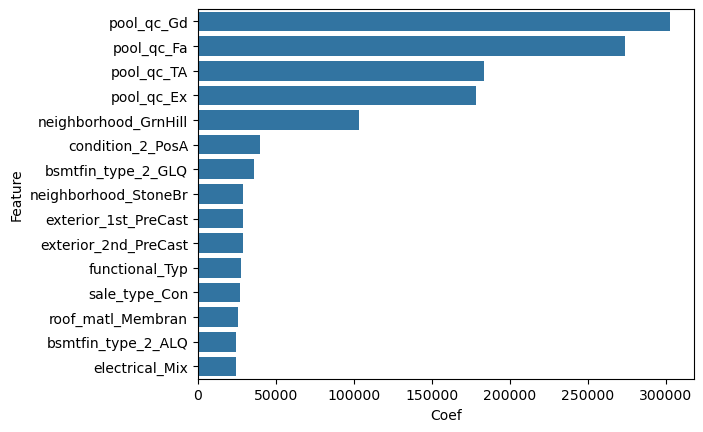

In [27]:
sns.barplot(data = sorted_df.head(15),
            x = 'Coef',
            y = 'Feature');

**ALL ELSE BEING CONSTANT**, having a pool rated 'Good' is associated with a $302,830 increase in predicted sale price compared to not having a pool.

In [29]:
# Observing how many good rated pools there were
X_train['pool_qc_Gd'].sum()


3

In [86]:
# Step 1: Get support count (sum of 1s for one-hot/dummies; valid for numeric too)
feature_support = X_train.sum()

# Step 2: Combine with coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_,
    'Support': feature_support
})

# Step 3: Add absolute value of coefficient
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()

# Step 4: Flag likely noisy features
noisy_features = coef_df[
    (coef_df['Support'] <= 5) & 
    (coef_df['AbsCoefficient'] > 10000)
]

# Step 5: Sort by magnitude
noisy_features.sort_values(by='AbsCoefficient', ascending=False)


,Feature,Coefficient,Support,AbsCoefficient
pool_qc_Gd,pool_qc_Gd,302830.422767,3.0,302830.422767
pool_qc_Fa,pool_qc_Fa,274093.645394,2.0,274093.645394
pool_qc_TA,pool_qc_TA,183093.413335,3.0,183093.413335
pool_qc_Ex,pool_qc_Ex,178540.516683,2.0,178540.516683
neighborhood_GrnHill,neighborhood_GrnHill,103435.566700,2.0,103435.566700
misc_feature_TenC,misc_feature_TenC,-102314.584525,1.0,102314.584525
functional_Sal,functional_Sal,-56390.445539,1.0,56390.445539
condition_2_PosA,condition_2_PosA,39680.300378,3.0,39680.300378
heating_OthW,heating_OthW,-31401.677957,2.0,31401.677957
exterior_1st_PreCast,exterior_1st_PreCast,28820.070166,1.0,28820.070166


In [92]:
strong_features = coef_df[
    (coef_df['Support'] > 100) & 
    (coef_df['AbsCoefficient'] > 50)
].sort_values(by='AbsCoefficient', ascending=False)

strong_features.head(20)


,Feature,Coefficient,Support,AbsCoefficient
functional_Typ,functional_Typ,27719.738769,2179.0,27719.738769
bsmt_exposure_Gd,bsmt_exposure_Gd,21532.981458,231.0,21532.981458
bsmtfin_type_2_Unf,bsmtfin_type_2_Unf,20878.857387,1991.0,20878.857387
roof_matl_CompShg,roof_matl_CompShg,-20223.221173,2304.0,20223.221173
bsmt_qual_Gd,bsmt_qual_Gd,-19525.541231,964.0,19525.541231
neighborhood_NWAmes,neighborhood_NWAmes,-18980.134995,108.0,18980.134995
bsmt_qual_TA,bsmt_qual_TA,-18116.781315,1045.0,18116.781315
street_Pave,street_Pave,17564.056101,2331.0,17564.056101
neighborhood_Gilbert,neighborhood_Gilbert,-14900.114490,133.0,14900.114490
neighborhood_NAmes,neighborhood_NAmes,-14856.155299,357.0,14856.155299


In [30]:
X_train['overall_qual'].value_counts()


overall_qual
5     671
6     582
7     483
8     273
4     178
9      88
3      34
10     20
2       8
1       3
Name: count, dtype: int64

In [31]:
coef_df.loc[coef_df['Feature'] == 'overall_qual']


,Feature,Coef
3,overall_qual,6902.287671


**HOLDING ALL ELSE CONSTANT**, the model estimates that for every 1 point increase in overall quality (a 1-10 rating of overall home quality) the sale price increases by approximately $6902.

This feature is well distributed within the dataset.

The direction and magnitude of the coefficient align with domain knowledge, higher quality homes sell for more

Unlike rare categories, this relationship is backed by a large margin of support across the data and is unlikely to be driven by noise. 

In [82]:
X_train['gr_liv_area'].value_counts()

gr_liv_area
864     30
1040    19
1092    18
1200    15
1456    14
        ..
1090     1
660      1
1317     1
1146     1
1970     1
Name: count, Length: 1155, dtype: int64

In [78]:
coef_df.loc[coef_df['Feature'] == 'gr_liv_area']


,Feature,Coef
10,gr_liv_area,66.438091


In [33]:
coef_df.sort_values(by = 'Coef')

,Feature,Coef
256,misc_feature_TenC,-102314.584525
234,functional_Sal,-56390.445539
210,heating_OthW,-31401.677957
103,condition_2_RRAe,-23786.563069
114,house_style_2.5Fin,-22473.904294
...,...,...
71,neighborhood_GrnHill,103435.566700
245,pool_qc_Ex,178540.516683
248,pool_qc_TA,183093.413335
246,pool_qc_Fa,274093.645394


##### Some features with extreme negative coefficients were found to be tied to rare categories (appearing in fewer than 5 homes) and likely reflect noise rather than true relationships.

### Residual Diagnosis

In [36]:
# Residuals are the difference between the actual price and the predicted price

# We do not want to judge the model on data it has already seen which is why we use y_test here


residuals = y_test - test_preds

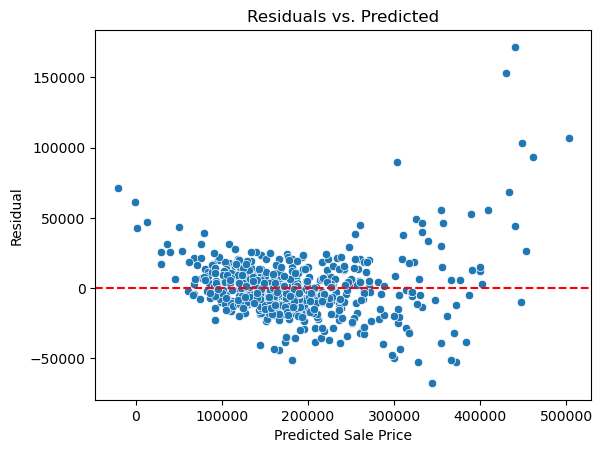

In [71]:
sns.scatterplot(x = test_preds,
                y = residuals)
plt.axhline(0,
            color = 'red',
            linestyle = '--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residual')
plt.savefig("residuals_plot.png");

> The majority of residuals are centered around 0
> Slight funneling (wider spread) at higher predicted values (above $300K)
> This could suggest mild heteroscedasticity: the model’s errors increase as home prices rise

>The residuals are randomly distributed around zero, indicating that the model satisfies the assumptions of linearity and independence.
While there is some increased variance in residuals at higher predicted sale prices, this is a common pattern in housing models due to the wider range and variability of luxury properties.
Overall, the residual distribution supports that the model generalizes well. 

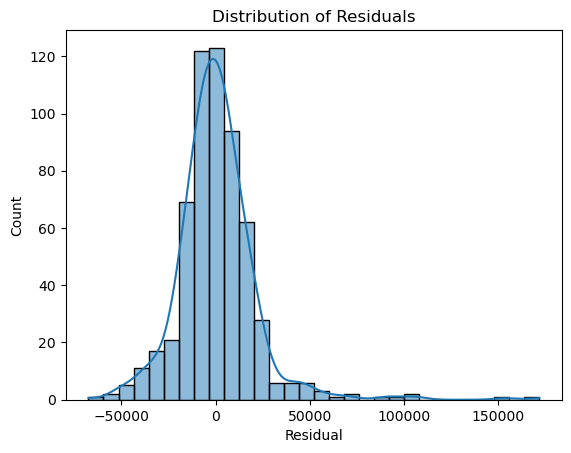

In [39]:
sns.histplot(residuals,
             bins = 30,
             kde = True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual');

In [40]:
# Saving house predictions to a csv

# Step 1: Create a DataFrame of actual vs. predicted values
predictions_df = pd.DataFrame({
    'Actual SalePrice': y_test,
    'Predicted SalePrice': test_preds
})

# Step 2: Save it to a CSV file
predictions_df.to_csv('model_predictions.csv', index=False)
